# Stochastic Degradation model

This example shows how the stochastic degradation model can be used.
This model describes the stochastic process of a single chemical reaction, in which the concentration of a substance degrades over time as particles react.
The substance degrades starting from an initial concentration, $n_0$, to 0 following a rate constant, $k$, according to the following model ([Erban et al., 2007](https://arxiv.org/abs/0704.1908)):
   $$A \xrightarrow{\text{k}} \emptyset$$

The model is simulated according to the Gillespie stochastic simulation algorithm (Gillespie, 1976).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pints
import pints.toy.stochastic

Specify the initial concentration, and select time points at which to record concentration values, and rate constant value (k):

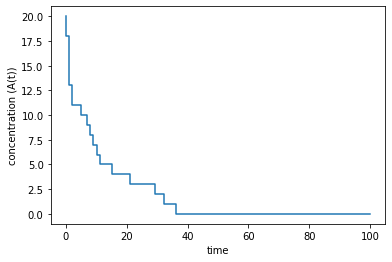

In [2]:
n_0 = 20
model = pints.toy.stochastic.DegradationModel(n_0)

times = np.linspace(0, 100, 100)
k = [0.1]

values = model.simulate(k, times)

plt.step(times, values)
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, averaging the concentration values at each time step, has a mean which tends towards the following deterministic function as the number of iterations tends to infinity (Erban et al., 2007): $ n_0e^{-kt} $.


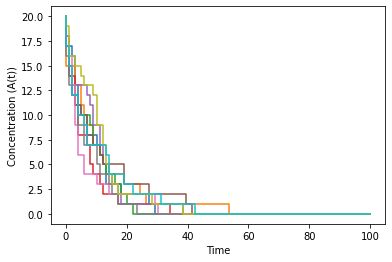

In [19]:
for i in range(10):
    values = model.simulate(k, times)
    plt.step(times, values)
    
# plt.title('Stochastic degradation across different iterations')
plt.xlabel('Time')
plt.ylabel('Concentration (A(t))')
plt.show()

# import os

# __file = r"C:\Users\Victor\Desktop\disertation_2022\background"

# my_path = os.path.abspath(__file)

# plt.savefig(my_path + '/degradation_ex1.pdf')

We now plot the analytic mean and standard deviation of this process.
The deterministic variance of this model is given by: $e^{-2kt}(-1 + e^{kt})n_0$

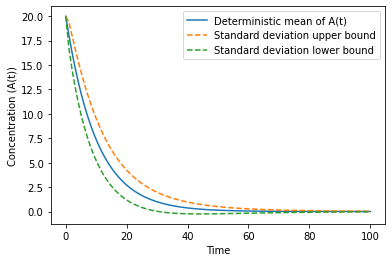

In [10]:
mean = model.mean(k, times)
variance = model.variance(k, times)
std_dev = np.sqrt(variance)

plt.plot(times, mean, '-', label = 'Deterministic mean of A(t)')
plt.plot(times, mean + std_dev, '--', label = 'Standard deviation upper bound')
plt.plot(times, mean - std_dev, '--', label = 'Standard deviation lower bound')
plt.legend(loc = 'upper right')
plt.xlabel('Time')
plt.ylabel('Concentration (A(t))')
# plt.show()


import os

__file = r"C:\Users\Victor\Desktop\disertation_2022\background"

my_path = os.path.abspath(__file)

plt.savefig(my_path + '/degradation_ex2.pdf')

In [20]:
np.random.seed(0)

from math import comb

n_0 = 20

# Probability for one data point
def compute_prob(n, t, k):
    exp_term = np.exp(-k * n * t)
    comb_term = comb(n_0, int(n)) 
    t_term = (1 - np.exp(-k * t)) 
    return exp_term * comb_term * (t_term ** (n_0 - n))

# Probability for multiple data points
def prob_gen(data, times, k):
    all_prob = 1.0
    for i in range(len(data)):
        computed_prob = compute_prob(data[i][0], times[i], k)
        all_prob *= computed_prob
    return all_prob


# Compute integral
from scipy import integrate

func = lambda x : prob_gen(values, times, x)
int_val = integrate.quad(func, 0.01, 0.3)
print("likelihood integrate value="+str(int_val[0]))

# True posterior
def posterior(data, times, k):
    return prob_gen(data, times, k) / int_val[0]

thetas = np.linspace(0.01, 0.3, 200)
true_prob = []
for i in range(len(thetas)):
    true_prob.append(posterior(values, times, thetas[i]))

v_func = lambda x : posterior(values, times, x)
i_val = integrate.quad(v_func, 0.01, 0.3)

print("posterior integrate value="+str(i_val[0]))

likelihood integrate value=2.695028054184442e-32
posterior integrate value=0.9518501992576583


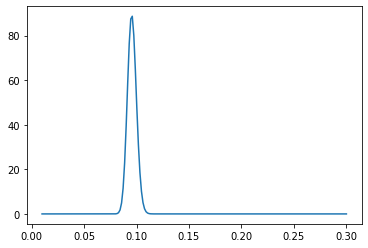

In [21]:
plt.plot(thetas, true_prob)

import os

__file = r"C:\Users\Victor\Desktop\disertation_2022\background"

my_path = os.path.abspath(__file)

plt.savefig(my_path + '/degradation_ex3.pdf')